## Library

In [2]:
import pickle
from pathlib import Path # open files on the same project
from scipy import signal
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split # split train and test dataset
from sklearn.preprocessing import MaxAbsScaler
import cufflinks as cf # interactive plots
cf.go_offline()
%run ..\..\Data\triangulars.ipynb
%run ..\Function.ipynb

In [3]:
from gplearn.genetic import SymbolicRegressor
from gplearn.functions import make_function

## Load data

Dependent variable

In [4]:
path_y = Path().resolve().parents[1] / "Data" / "Data1.xlsx"
consumo = pd.read_excel(path_y)
consumo = consumo.set_index("fecha").loc["2007-01-01":"2020-03-30"]

Public Holidays dependent variable

In [5]:
festivos=pd.read_excel(Path().resolve().parents[1] / "Data" /"Festivos.xlsx")
festivos2=pd.read_excel(Path().resolve().parents[1] / "Data" / "Festivos2.xlsx")
fest = triangulars().festivos(X = consumo, festivos = festivos, festivos2 = festivos2)

## Create X

In [6]:
t = np.arange(1, consumo.size+1).reshape(-1, 1)
week = consumo.index.weekday
weekyear = consumo.index.isocalendar().week

In [7]:
weekd = pd.get_dummies(week, prefix = "wday", drop_first = True); weekd.index = consumo.index
weekyeard = pd.get_dummies(weekyear, prefix = "wyear", drop_first = True); weekyeard.index = consumo.index

X = triangulars().diffseason(consumo)
X = pd.concat([X, weekd], axis = 1)
X = pd.concat([X, weekyeard], axis = 1)
X = pd.concat([X, fest], axis = 1)
X["t"] = t

In [8]:
X.shape

(4838, 87)

## Load model and prediction

Load Linear model

In [9]:
with open("LRmod", "rb") as f:
    LRmod = pickle.load(f)

In [10]:
resid = pd.DataFrame(LRmod.predict(X), index = consumo.index, columns = ["predictLR"])
resid["real"] = consumo.values.reshape(-1)

In [11]:
resid.iplot()

Get residual

In [12]:
residual = consumo.MWh - resid.predictLR

## Find Fourier periods

In [13]:
y_train, y_test = train_test_split(residual, test_size = 365, shuffle = False)

In [52]:
f, asd = signal.periodogram(y_train, 1)
# plt.figure()
# plt.plot(1/f, asd)
picos = pd.DataFrame(asd, 1/(f), columns=["potencia"])
picos = picos.sort_values(by="potencia",ascending=False).reset_index().head(13).tail(6)
# picos = picos.drop([0, 1])
picos.columns = ["periodo", "potencia"]

#fourier
sencos = pd.DataFrame(index = residual.index)
t = np.arange(1,len(residual)+1)
sencos["t"]=t
for i  in  picos.periodo:
        sencos[f"{i:.2f}_sen"] = np.abs(np.sin(((2*np.pi)/(i))*t))
        sencos[f"{i:.2f}_cos"] = np.abs(np.cos(((2*np.pi)/(i))*t))
sencos['ones']=1
sencos['sen1']=np.abs(np.sin(((2*np.pi)/(365.25))*t))
sencos['cos1']=np.abs(np.cos(((2*np.pi)/(365.25))*t))
sencos = sencos/sencos.max()

C:\Users\alber\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: RuntimeWarning:

divide by zero encountered in true_divide



In [53]:
len(y_train)

4473

C:\Users\alber\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: RuntimeWarning:

divide by zero encountered in true_divide



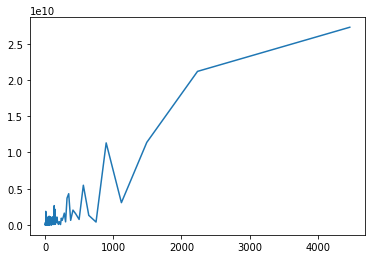

In [54]:
plt.figure()
plt.plot(1/f, asd)

In [57]:
picos.periodo

7     1118.250000
8      131.558824
9      144.290323
10     406.636364
11       7.010972
12     279.562500
Name: periodo, dtype: float64

## Functions

In [59]:
# for i in picos.periodo:
#     print(f"""
# def cos_{int(i)}(x1): return np.cos(2*np.pi*x1/{i})
    
# cos_{int(i)} = make_function(function=cos_{int(i)}, name='cos_{int(i)}', arity=1)
    
# def sin_{int(i)}(x1): return np.sin(2*np.pi*x1/{i})
    
# sin_{int(i)} = make_function(function=sin_{int(i)}, name='sin_{int(i)}', arity=1)
#     """)

In [63]:
# for i in picos.periodo:
#     print(f"cos_{int(i)}, sin_{int(i)}", end = ", ")

In [18]:
def mape_(df):return np.mean(np.abs((df.predict - df.real)/df.real))*100

In [19]:
cos_7 = make_function(function=CustomSC.cos_7, name='cos_7', arity=1)

sin_7 = make_function(function=CustomSC.sin_7, name='sin_7', arity=1)

cos_365 = make_function(function=CustomSC.cos_365, name='cos_365', arity=1)

sin_365 = make_function(function=CustomSC.sin_365, name='sin_365', arity=1)

abscos_14 = make_function(function=CustomSC.abscos_14, name='abscos_14', arity=1)

abssin_14 = make_function(function=CustomSC.abssin_14, name='abssin_14', arity=1)

In [66]:
def cos_1118(x1): return np.cos(2*np.pi*x1/1118.25)
    
cos_1118 = make_function(function=cos_1118, name='cos_1118', arity=1)
    
def sin_1118(x1): return np.sin(2*np.pi*x1/1118.25)
    
sin_1118 = make_function(function=sin_1118, name='sin_1118', arity=1)
    

def cos_131(x1): return np.cos(2*np.pi*x1/131.55882352941177)
    
cos_131 = make_function(function=cos_131, name='cos_131', arity=1)
    
def sin_131(x1): return np.sin(2*np.pi*x1/131.55882352941177)
    
sin_131 = make_function(function=sin_131, name='sin_131', arity=1)
    

def cos_144(x1): return np.cos(2*np.pi*x1/144.29032258064515)
    
cos_144 = make_function(function=cos_144, name='cos_144', arity=1)
    
def sin_144(x1): return np.sin(2*np.pi*x1/144.29032258064515)
    
sin_144 = make_function(function=sin_144, name='sin_144', arity=1)
    

def cos_406(x1): return np.cos(2*np.pi*x1/406.63636363636357)
    
cos_406 = make_function(function=cos_406, name='cos_406', arity=1)
    
def sin_406(x1): return np.sin(2*np.pi*x1/406.63636363636357)
    
sin_406 = make_function(function=sin_406, name='sin_406', arity=1)
    

def cos_7(x1): return np.cos(2*np.pi*x1/7.010971786833856)
    
cos_7 = make_function(function=cos_7, name='cos_7', arity=1)
    
def sin_7(x1): return np.sin(2*np.pi*x1/7.010971786833856)
    
sin_7 = make_function(function=sin_7, name='sin_7', arity=1)
    

def cos_279(x1): return np.cos(2*np.pi*x1/279.5625)
    
cos_279 = make_function(function=cos_279, name='cos_279', arity=1)
    
def sin_279(x1): return np.sin(2*np.pi*x1/279.5625)
    
sin_279 = make_function(function=sin_279, name='sin_279', arity=1)

##  Fit the data

Split the data

In [96]:
X_train, X_test, y_train, y_test = train_test_split(t.reshape(-1, 1), residual, test_size = 365, shuffle = False)

Fit the model

In [97]:
reso = LinearRegression().fit(X_train, y_train)

In [104]:
reso = SymbolicRegressor(population_size=5000, init_method = "half and half",
                           p_crossover=0.5, p_subtree_mutation = 0.2, p_hoist_mutation = 0.15, p_point_mutation = 0.15,
                           warm_start = False,
                           function_set=('add', 'sub', 'mul', 'div', 'sin', 'cos', 'abs',
                                         cos_144, sin_144, 
                                         cos_406, sin_406, cos_7, sin_7, cos_279, sin_279, abssin_14, abscos_14), 
#                           feature_names = [*X.columns],
#                            metric = mape,
                           max_samples = 0.85,
                           generations=200, stopping_criteria=0.01, parsimony_coefficient=0.01,
                           verbose=1, random_state=1)

In [105]:
reso.fit(X_train, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0     8.55      1.51211e+06        5          5168.99          5708.91     37.23m
   1     7.99          23957.2        6          5154.54          5790.99     39.21m
   2     8.01          14604.3        5          5130.48          5926.88     37.87m
   3     8.18          15793.1        8           5174.6          5677.36     43.00m
   4     8.40           135563       12          5155.96          5782.55     35.82m
   5     7.79          26332.1        7          5156.28          5780.99     34.59m
   6     7.88          40239.8        5          5166.64          5722.56     35.00m
   7     7.98          23868.3        2          5161.69          5750.08     34.61m
   8     7.62          34459.7        9          5157.78          5772.29  

  94   144.25      3.95566e+12       96          4616.61           5104.2    131.97m
  95   142.93      1.13402e+07       64          4627.68          5023.47    129.79m
  96   136.81       8.9261e+09      186          4612.08          5125.03    123.84m
  97   149.63      2.68558e+08      127           4611.7          5051.19    133.62m
  98   165.60        8.185e+06       86          4598.59          5102.07    144.75m
  99   170.87      8.08573e+06      257          4597.62          5103.12    148.73m
 100   179.87           209286      169          4595.12          5121.87    155.73m
 101   184.61      8.21526e+06      251          4593.76          5120.68    157.65m
 102   187.56           180896      158           4576.7          5217.46    170.27m
 103   192.62          41417.7      277          4592.76          5135.22    167.78m
 104   209.18      4.26315e+06      194           4591.6          5106.73    179.43m
 105   230.73      3.08818e+06      190           4571.2         

 191   288.17          34351.9      148          4546.66          5105.87     21.53m
 192   292.24          42978.8      444          4540.18          5138.22     16.99m
 193   305.03           799294      240          4548.34          5082.07     15.45m
 194   294.20      1.12214e+06      314          4523.07          5239.62     12.92m
 195   298.44          43556.9      120          4540.31          5141.87     10.31m
 196   305.08           158123      303          4550.61           5083.5      8.35m
 197   303.18      1.06212e+06      741             4541          5137.94      4.94m
 198   301.56      9.34302e+06      408          4542.26          5126.43      2.60m
 199   279.12      1.12472e+09      203          4547.75          5099.73      0.00s


SymbolicRegressor(const_range=(-1.0, 1.0), feature_names=None,
                  function_set=('add', 'sub', 'mul', 'div', 'sin', 'cos', 'abs',
                                <gplearn.f...
                  generations=200, init_depth=(2, 6),
                  init_method='half and half', low_memory=False,
                  max_samples=0.85, metric='mean absolute error', n_jobs=1,
                  p_crossover=0.5, p_hoist_mutation=0.15, p_point_mutation=0.15,
                  p_point_replace=0.05, p_subtree_mutation=0.2,
                  parsimony_coefficient=0.01, population_size=5000,
                  random_state=1, stopping_criteria=0.01, tournament_size=20,
                  verbose=1, warm_start=False)

Predict

In [106]:
tr = reso.predict(X_train)
te = reso.predict(X_test)
predict = np.hstack([tr, te])

In [107]:
plottn = pd.DataFrame(predict, index = consumo.index, columns = ["predict"])
plottn["real"] = residual.values.reshape(-1)

In [108]:
mape = mape_(plottn)
plottn[["real", "predict"]].iplot(title = f"Mape: {mape:.2f}")

In [109]:
(plottn.real - plottn.predict).iplot()

In [110]:
lok = plottn.loc["2019-03-30":"2020-03-30"]
mape = mape_(lok)
lok[["real", "predict"]].iplot(title = f"Mape: {mape:.2f}")

In [208]:
plottn.predict + 

fecha
2015-01-01    899.494644
2015-01-02    841.436161
2015-01-03    775.662339
2015-01-04    704.574808
2015-01-05    630.599015
                 ...    
2020-03-26    375.383769
2020-03-27    439.839933
2020-03-28    499.081762
2020-03-29    550.709561
2020-03-30    592.369411
Name: predict, Length: 1916, dtype: float64